# Getting some insights from brazilians mutual funds public portifolios

**What ?** In Brazil the CVM is the capital market regulatory entity like SEC in USA. On CVM public webpage there is a bunch of financial data available to download by the commum public in order to bring transparancy for the market. One of this data it is the ticker by ticker holding assets from the brazilian regulated funds. A lot of insights can be taken from this data as you can seen on this foloowing notebook...

**Why ?** The knowledge of the holding assets from huge funds can show us how the smart money has been invested by the professional players on the stock markets

**How ?** The data is gonna be crawler from the CVM website using requests and beatiful soup library. After, a Extract Transfrom and Load process is gonna take place in order to ajust the data. Finally some graphics and statistical analysis will show us interesting insights over the holdins os brazilian funds


In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
path_sqldatabase = r'C:\\Users\\lucas\\OneDrive\\FundsExplore\\Databases\\' #database path 

conn = sqlite3.connect(path_sqldatabase+'CVM_Database_20240410.db')

script =  '''
SELECT DT_COMPTC as "data_ref",
	bc4.CNPJ_FUNDO as "fund_id",
	CASE WHEN bc4.DENOM_SOCIAL IS NULL THEN cad.DENOM_SOCIAL ELSE bc4.DENOM_SOCIAL END as "fund_name",
	CASE WHEN bc4.TP_FUNDO IS NULL THEN cad.TP_FUNDO ELSE bc4.TP_FUNDO END as "fund_type",
	TP_APLIC as "holding_asset_class",
	TP_ATIVO as "holding_asset_type",
	CD_ATIVO as "holding_ticker",
	DS_ATIVO as "holding_asset_desc",
	CD_ISIN as "holding_ISIN",
	-- cad funds
	CLASSE as "fund_reg_class",
	CLASSE_ANBIMA as "fund_auto_class",
	CONDOM as "fund_openend_type",
	FUNDO_EXCLUSIVO as "fund_exclusive",
	PUBLICO_ALVO as "fund_audience",
	GESTOR as "manager_name",
	CPF_CNPJ_GESTOR as "manager_id",
	VL_PATRIM_LIQ as "total_net_assets",
	SUM(VL_MERC_POS_FINAL) as "total_holdings",
	SUM(QT_POS_FINAL) as "qtd_holdings"
FROM CDA_bloco_4 bc4
LEFT JOIN (SELECT -- cadastral funds basic infos
		    CNPJ_FUNDO,
			DENOM_SOCIAL,
			CLASSE,
			CLASSE_ANBIMA,
			TP_FUNDO,
			CONDOM,
			FUNDO_EXCLUSIVO,
			PUBLICO_ALVO,
			GESTOR,
			CPF_CNPJ_GESTOR,
			VL_PATRIM_LIQ
		FROM CAD_FI_cad_fi_atual
		WHERE SIT NOT IN('CANCELADA') -- exclude the the funds situations that isn't valid anymore
		AND DT_PATRIM_LIQ -- most update register
		GROUP BY 
			DENOM_SOCIAL,
			CNPJ_FUNDO,
			CLASSE,
			CLASSE_ANBIMA,
			TP_FUNDO,
			CONDOM,
			FUNDO_EXCLUSIVO,
			PUBLICO_ALVO,
			GESTOR,
			CPF_CNPJ_GESTOR,
			VL_PATRIM_LIQ
		ORDER BY DT_PATRIM_LIQ DESC) cad on  
       bc4.CNPJ_FUNDO = cad.CNPJ_FUNDO
WHERE DT_COMPTC = '2024-03-31'
GROUP BY 
DT_COMPTC,
bc4.CNPJ_FUNDO,
CASE WHEN bc4.DENOM_SOCIAL IS NULL THEN cad.DENOM_SOCIAL ELSE bc4.DENOM_SOCIAL END,
CASE WHEN bc4.TP_FUNDO IS NULL THEN cad.TP_FUNDO ELSE bc4.TP_FUNDO END,
	TP_APLIC,
	TP_ATIVO,
	CD_ATIVO,
	DS_ATIVO,
	CD_ISIN,
	-- cad funds
	CLASSE,
	CLASSE_ANBIMA,
	CONDOM,
	FUNDO_EXCLUSIVO,
	PUBLICO_ALVO,
	GESTOR,
	CPF_CNPJ_GESTOR,
	VL_PATRIM_LIQ
    '''

df = pd.read_sql_query(script, conn)

conn.close()

In [3]:
df.head()

,data_ref,fund_id,fund_name,fund_type,holding_asset_class,holding_asset_type,holding_ticker,holding_asset_desc,holding_ISIN,fund_reg_class,fund_auto_class,fund_openend_type,fund_exclusive,fund_audience,manager_name,manager_id,total_net_assets,total_holdings,qtd_holdings
0,2024-03-31,00.083.181/0001-67,OPP I FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL...,FI,Ações,Ação ordinária,STBP3,SANTOS BRP ON NM,BRSTBPACNOR3,Fundo de Ações,Fechados de Ações,Fechado,N,Profissional,OPPORTUNITY HDF ADMINISTRADORA DE RECURSOS LTDA.,33.857.830/0001-99,1.984215e+10,63077392.80,4735540.0
1,2024-03-31,00.322.699/0001-06,BRADESCO H FUNDO DE INVESTIMENTO RENDA FIXA RE...,FI,Debêntures,Debênture simples,ALGTA3,DEB,BRALGTDBS0J8,Fundo de Renda Fixa,Renda Fixa Duração Baixa Grau de Invest.,Aberto,N,Público Geral,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,62.375.134/0001-44,3.374453e+09,14468638.07,14088.0
2,2024-03-31,00.322.699/0001-06,BRADESCO H FUNDO DE INVESTIMENTO RENDA FIXA RE...,FI,Debêntures,Debênture simples,ALSO16,DEB,BRALSODBS064,Fundo de Renda Fixa,Renda Fixa Duração Baixa Grau de Invest.,Aberto,N,Público Geral,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,62.375.134/0001-44,3.374453e+09,5538345.42,5444.0
3,2024-03-31,00.322.699/0001-06,BRADESCO H FUNDO DE INVESTIMENTO RENDA FIXA RE...,FI,Debêntures,Debênture simples,ANHBA2,DEB,BRANHBDBS0H9,Fundo de Renda Fixa,Renda Fixa Duração Baixa Grau de Invest.,Aberto,N,Público Geral,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,62.375.134/0001-44,3.374453e+09,3928744.70,3698.0
4,2024-03-31,00.322.699/0001-06,BRADESCO H FUNDO DE INVESTIMENTO RENDA FIXA RE...,FI,Debêntures,Debênture simples,ANHBA4,DEB,BRANHBDBS0J5,Fundo de Renda Fixa,Renda Fixa Duração Baixa Grau de Invest.,Aberto,N,Público Geral,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,62.375.134/0001-44,3.374453e+09,18900258.82,17728.0


## Top 5 cash equity asset holdings funds

In [42]:
df1 = pd.pivot_table(df,
               values = ['total_holdings','total_net_assets'],
               index = ['fund_id','fund_name','manager_name'],
               aggfunc = {'total_holdings':'sum',
                          'total_net_assets':'first'}).sort_values(by = ['total_holdings'], ascending = False).reset_index()
df1['total_net_assets_bi'] = df1['total_net_assets']/1e9
df1['total_holdings_bi'] = df1['total_holdings']/1e9
df1 = df1[['fund_id','fund_name','manager_name','total_net_assets_bi','total_holdings_bi']]
df1.head(5)

,fund_id,fund_name,manager_name,total_net_assets_bi,total_holdings_bi
0,08.196.003/0001-54,FUNDO DE INVESTIMENTO DE AÇÕES DINÂMICA ENERGIA,BANCO CLÁSSICO S.A.,22.263702,15.813706
1,28.428.069/0001-30,BRADESCO FUNDO DE INVESTIMENTO RENDA FIXA CRED...,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,39.574352,10.898295
2,07.593.967/0001-73,BRASILPREV TOP TP FUNDO DE INVESTIMENTO RENDA ...,BB GESTAO DE RECURSOS DTVM S.A,29.187160,9.363666
3,01.630.558/0001-13,SANTANDER RF REF DI FI,SANTANDER BRASIL GESTÃO DE RECURSOS LTDA,53.684867,7.226729
4,32.312.120/0001-10,BRAM FUNDO DE INVESTIMENTO RENDA FIXA REFERENC...,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,48.859258,6.135936


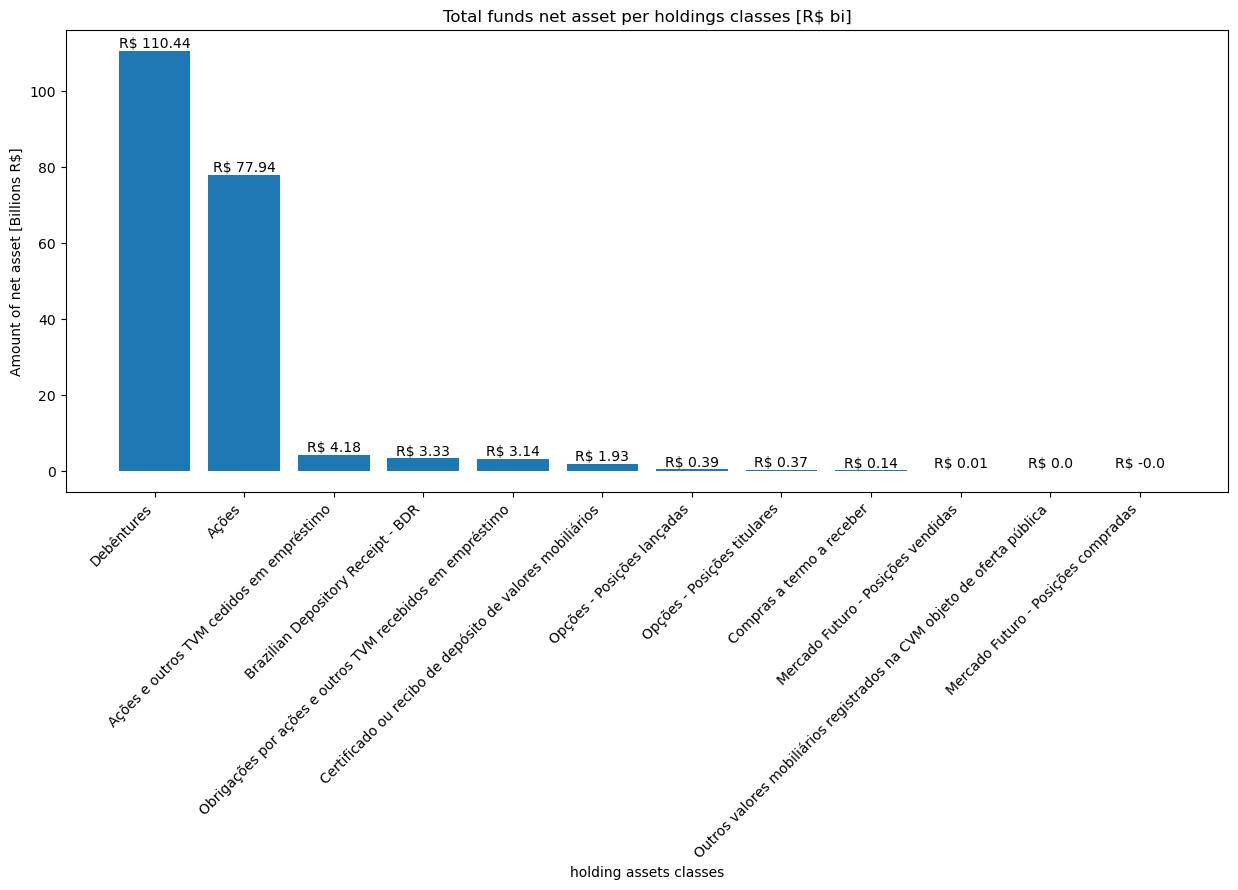

In [76]:
# Which asset class have more participation on funds total net holdings ?
df2 = pd.pivot_table(df,
               values = ['total_holdings'],
               index = ['holding_asset_class'],
               aggfunc = {'total_holdings':'sum'}).sort_values(by = ['total_holdings'], ascending = False).reset_index()

df2['total_holdings_bi'] = df2['total_holdings']/1e9 #coverting i billions
df2.drop(columns = ['total_holdings'], inplace = True)

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(df2['holding_asset_class'],df2['total_holdings_bi'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 'R$ '+round(yval, 2).astype(str), ha='center', va='bottom')

plt.title('Total funds net asset per holdings classes [R$ bi]')
plt.xlabel('holding assets classes')
plt.ylabel('Amount of net asset [Billions R$]')
plt.xticks(rotation=45,ha='right')

plt.show()

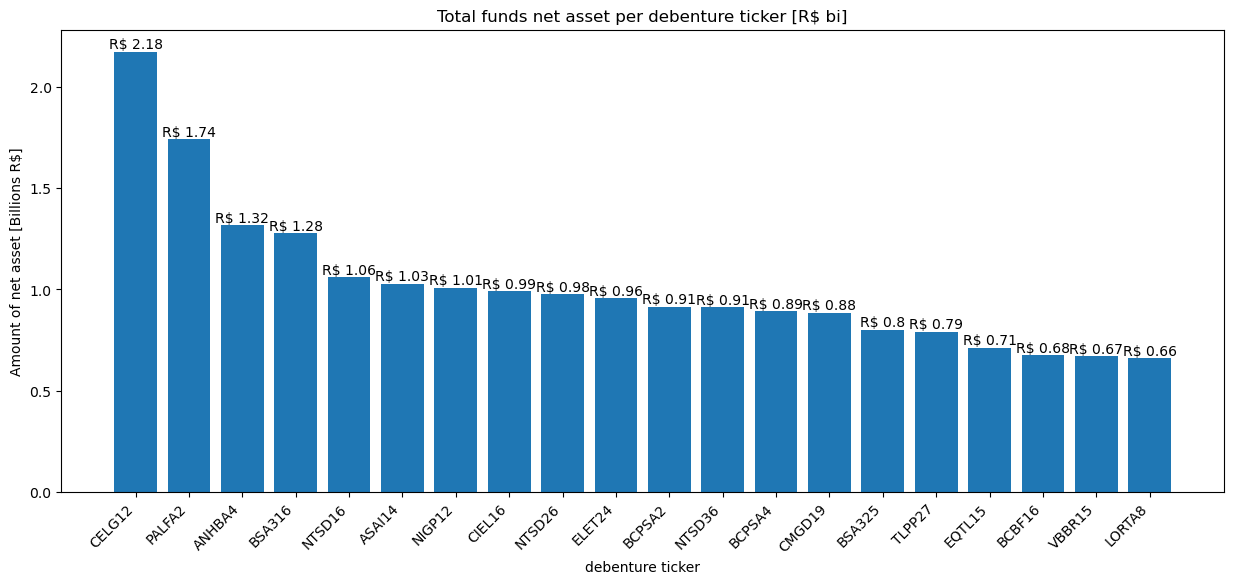

In [79]:
# Which top 20 debentures tickers have more participation on funds total net holdings ?

df3 = pd.pivot_table(df[df['holding_asset_class'] == 'Debêntures'],
               values = ['total_holdings'],
               index = ['holding_ticker'],
               aggfunc = {'total_holdings':'sum'}).sort_values(by = ['total_holdings'], ascending = False).reset_index()

df3['total_holdings_bi'] = df3['total_holdings']/1e9 #coverting i billions
df3.drop(columns = ['total_holdings'], inplace = True)

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(df3['holding_ticker'].head(20),df3['total_holdings_bi'].head(20))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 'R$ '+round(yval, 2).astype(str), ha='center', va='bottom')

plt.title('Total funds net asset per debenture ticker [R$ bi]')
plt.xlabel('debenture ticker')
plt.ylabel('Amount of net asset [Billions R$]')
plt.xticks(rotation=45,ha='right')

plt.show()